# Arbab Abdul Basit                       

# P20-0097

# Anas Ashfaq                                

# P20-0008

# AI Lab Final Project

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn import preprocessing
from sklearn import datasets
from sklearn import tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re
import string

In [4]:
Dataset = pd.read_csv("C:/Users/dell/Dataset.txt")
Attack_types = pd.read_csv("C:/Users/dell/Attack_types.txt")

In [5]:
Dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


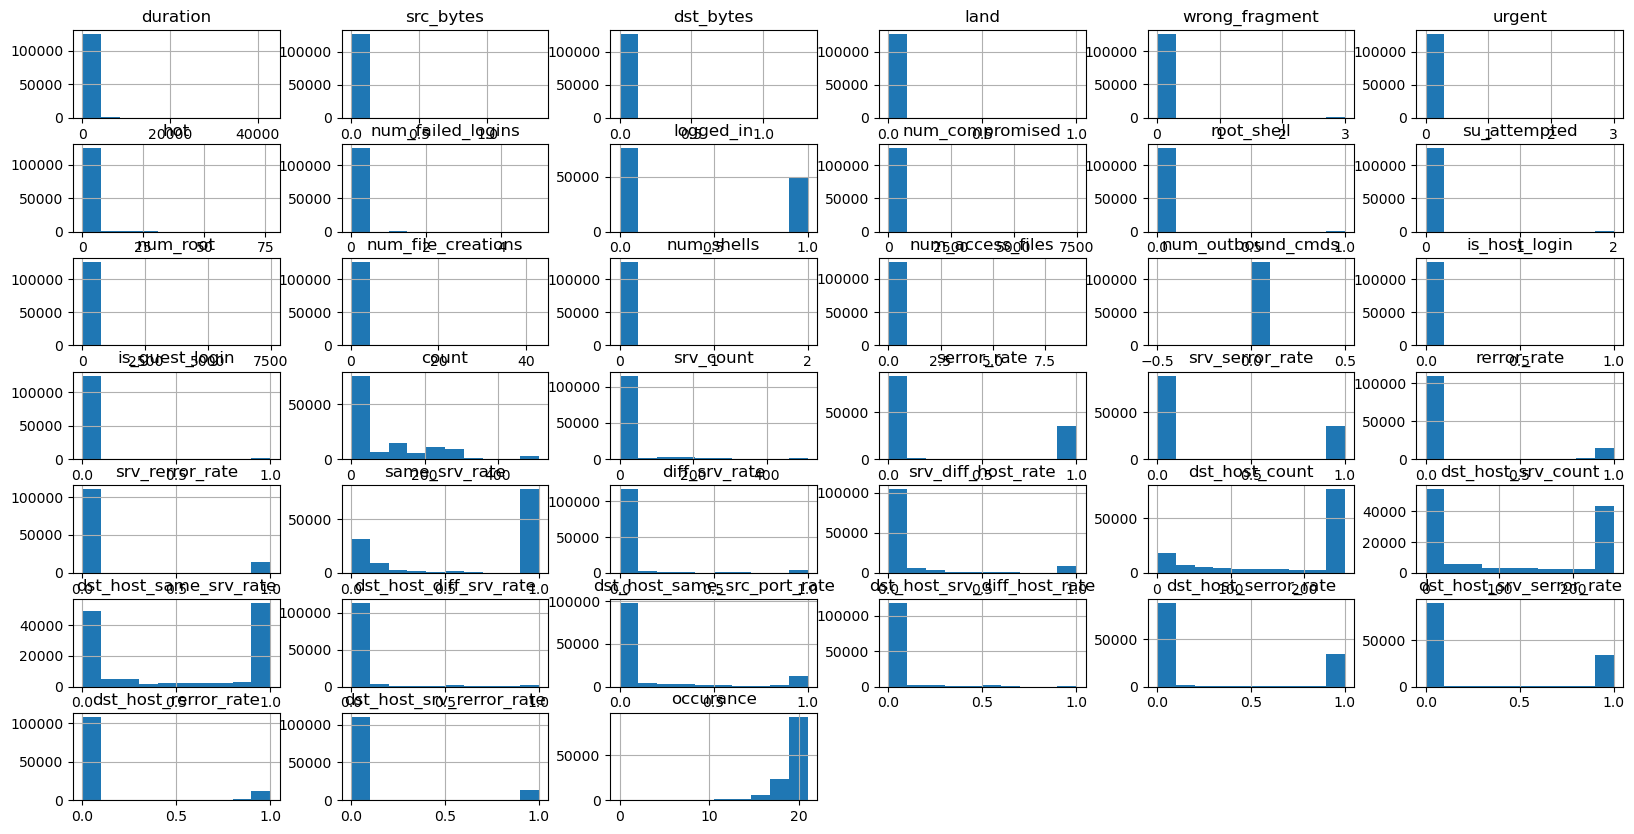

In [6]:
Dataset.hist(figsize=(20, 10))
plt.show()

In [7]:
print(Dataset.dtypes)

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [8]:
# CHeckiing for missing Values

print(Dataset.isnull().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [9]:
Dataset.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
125968    False
125969    False
125970    False
125971    False
125972    False
Length: 125973, dtype: bool

In [10]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [11]:
Dataset.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [12]:
Dataset.count() 

duration                       125973
protocol_type                  125973
service                        125973
flag                           125973
src_bytes                      125973
dst_bytes                      125973
land                           125973
wrong_fragment                 125973
urgent                         125973
hot                            125973
num_failed_logins              125973
logged_in                      125973
num_compromised                125973
root_shell                     125973
su_attempted                   125973
num_root                       125973
num_file_creations             125973
num_shells                     125973
num_access_files               125973
num_outbound_cmds              125973
is_host_login                  125973
is_guest_login                 125973
count                          125973
srv_count                      125973
serror_rate                    125973
srv_serror_rate                125973
rerror_rate 

In [13]:
Dataset.shape

(125973, 43)

In [14]:
Dataset = Dataset.drop_duplicates()

In [15]:
Dataset.shape

(125973, 43)

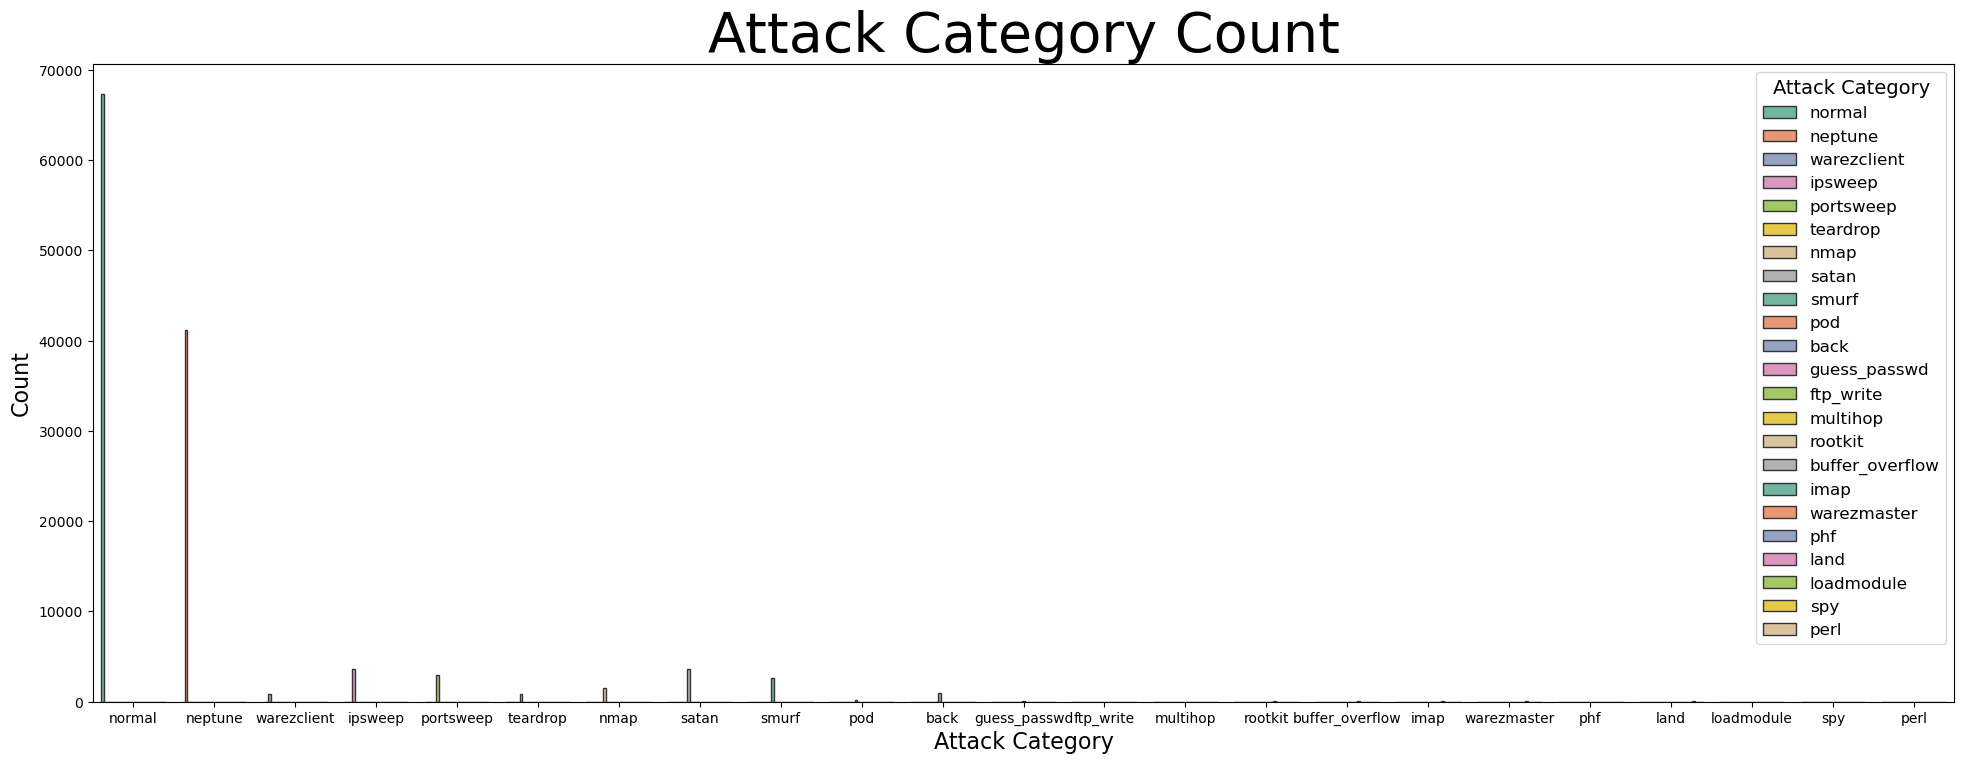

In [16]:
plt.figure(figsize=(20, 8)) # Set the figure size
sns.countplot(data=Dataset, x="attack_category", hue="attack_category", palette="Set2", 
              edgecolor="0.2") # Create the countplot with desired parameters
plt.title("Attack Category Count", fontsize=40) # Add a title to the plot
plt.xlabel("Attack Category", fontsize=16) # Add a label to the x-axis
plt.ylabel("Count", fontsize=16) # Add a label to the y-axis
plt.legend(title="Attack Category", fontsize=12, title_fontsize=14, loc="upper right") # Add a legend
#sns.despine() # Remove the top and right spines
plt.tight_layout(pad=2) # Add extra spacing between the plot and the axes
plt.show() # Display the plot


<Axes: xlabel='protocol_type', ylabel='count'>

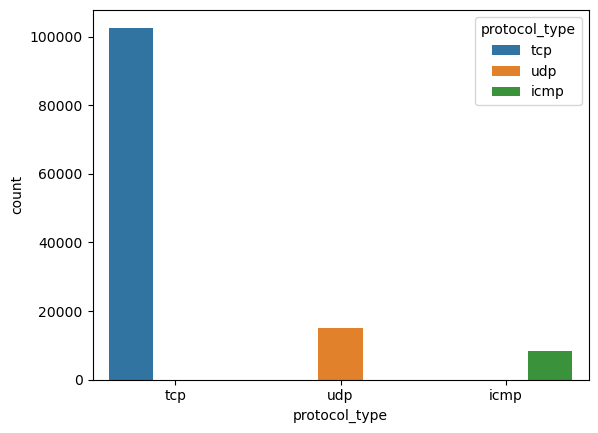

In [17]:
sns.countplot(data=Dataset, x="protocol_type", hue="protocol_type")

In [18]:
Attack_types

,attack_category attack_type
0,apache2 dos
1,back dos
2,mailbomb dos
3,processtable dos
4,snmpgetattack dos
5,teardrop dos
6,smurf dos
7,land dos
8,neptune dos
9,pod dos


In [19]:
Attack_types = pd.read_csv("C:/Users/dell/Attack_types.txt", sep='\s+', names=['attack_type', 'class'])

In [20]:
Attack_types 

,attack_type,class
0,attack_category,attack_type
1,apache2,dos
2,back,dos
3,mailbomb,dos
4,processtable,dos
5,snmpgetattack,dos
6,teardrop,dos
7,smurf,dos
8,land,dos
9,neptune,dos


In [21]:
# Removing 0th row

Attack_types  = Attack_types.drop(0)

In [22]:
Attack_types

,attack_type,class
1,apache2,dos
2,back,dos
3,mailbomb,dos
4,processtable,dos
5,snmpgetattack,dos
6,teardrop,dos
7,smurf,dos
8,land,dos
9,neptune,dos
10,pod,dos


In [23]:
# Creating a LabelEncoder object  
# catagorical values to numerical values---For model training bcz machine only understands numerical
le = LabelEncoder()

# Fitting and transforming the attack_category column in dataset2
Attack_types['attack_category_encoded'] = le.fit_transform(Attack_types['attack_type'])


In [24]:
Attack_types

,attack_type,class,attack_category_encoded
1,apache2,dos,0
2,back,dos,1
3,mailbomb,dos,10
4,processtable,dos,20
5,snmpgetattack,dos,27
6,teardrop,dos,31
7,smurf,dos,26
8,land,dos,8
9,neptune,dos,14
10,pod,dos,18


In [25]:
le = preprocessing.LabelEncoder()

Dataset['attack_category'] = le.fit_transform(Dataset['attack_category'])
Dataset['protocol_type'] = le.fit_transform(Dataset['protocol_type'])
Dataset['service'] = le.fit_transform(Dataset['service'])
Dataset['flag'] = le.fit_transform(Dataset['flag'])

Dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,11,20
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,11,15
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9,19
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11,21
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11,21


In [26]:
#Feature Scaling

In [28]:
# initialize scaler object
scaler = MinMaxScaler()

# select columns to scale
cols_to_scale = ['src_bytes', 'dst_bytes', 'dst_host_same_srv_rate',                   #Variations
                 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
                 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
                 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

# scale selected columns
Dataset[cols_to_scale] = scaler.fit_transform(Dataset[cols_to_scale])

In [29]:
Dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,1,20,9,3.558064e-07,0.000000e+00,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,11,20
1,0,2,44,9,1.057999e-07,0.000000e+00,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,11,15
2,0,1,49,5,0.000000e+00,0.000000e+00,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9,19
3,0,1,24,9,1.681203e-07,6.223962e-06,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11,21
4,0,1,24,9,1.442067e-07,3.206260e-07,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11,21


In [36]:
# Compute the Correlation Matrix

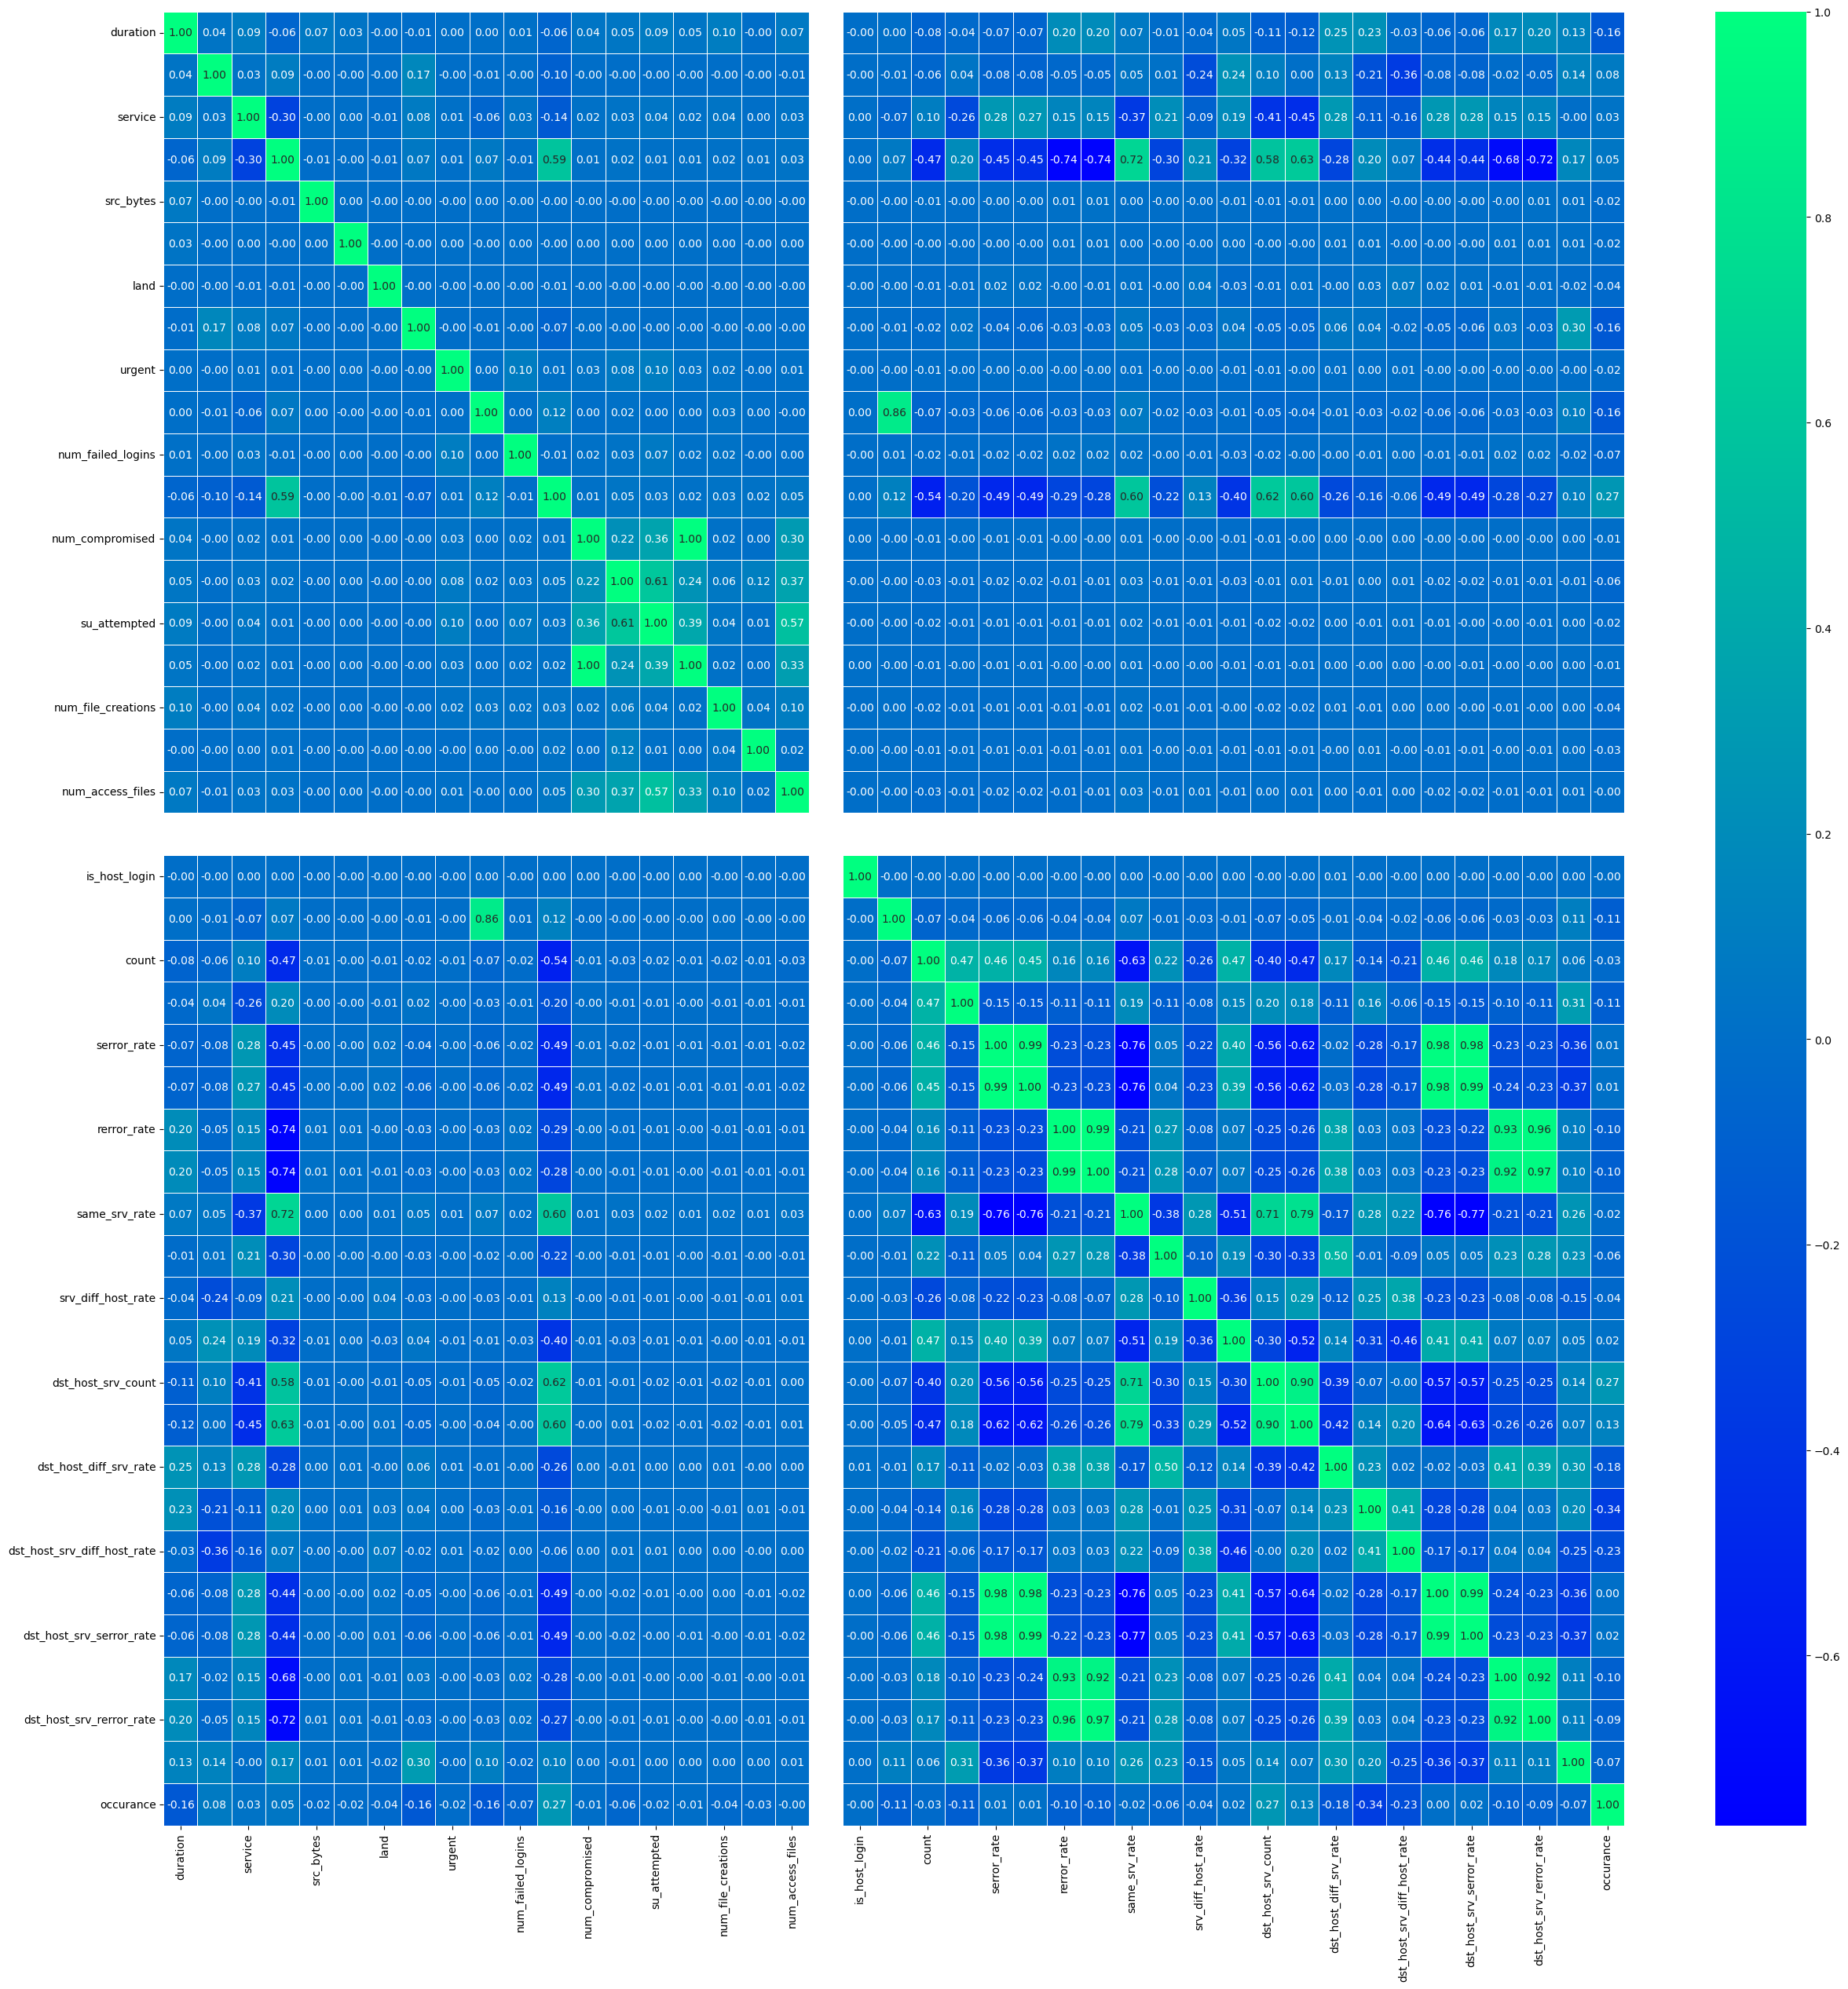

In [37]:
corr_matrix = Dataset.corr()
heatmap = sns.heatmap(corr_matrix, cmap="winter", cbar=True, linewidths=0.5, annot=True, fmt=".2f")
heatmap.figure.set_size_inches(30, 30)
plt.show()

In [41]:
# Handling Outliers
from scipy import stats

# load data

# get numerical columns except object type columns
num_cols = Dataset.select_dtypes(include=[np.number]).columns.tolist()

# remove columns with NaN values
num_cols = [col for col in num_cols if Dataset[col].notna().any()]

# remove object type columns
num_cols = [col for col in num_cols if Dataset[col].dtype != 'O']

# calculate z-scores for each column
z_scores = stats.zscore(Dataset[num_cols])

# identify rows with outliers in any column
outlier_rows = (abs(z_scores) > 3).any(axis=1)

# remove outlier rows from the dataframe
Dataset = Dataset[~outlier_rows]

In [46]:
print("Length of DataFrame before handling outliers:", len(Dataset))
print("Length of DataFrame after handling outliers:", len(Dataset))

Dataset.head()

Length of DataFrame before handling outliers: 100948
Length of DataFrame after handling outliers: 100948


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,1,20,9,3.558064e-07,0.000000e+00,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,11,20
1,0,2,44,9,1.057999e-07,0.000000e+00,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,11,15
2,0,1,49,5,0.000000e+00,0.000000e+00,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9,19
3,0,1,24,9,1.681203e-07,6.223962e-06,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11,21
4,0,1,24,9,1.442067e-07,3.206260e-07,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11,21


In [50]:
x = Dataset.drop('attack_category',axis=1)  # x values-
y = Dataset['attack_category']              # 
target column

In [51]:
# Standardize Data
#standardize it now
standard = preprocessing.scale(x)
standardized_x = pd.DataFrame(standard, columns= x.columns)
print(standardized_x)

        duration  protocol_type   service      flag  src_bytes  dst_bytes  \
0      -0.070452      -0.251714 -0.682491  0.822008  -0.044945  -0.080978   
1      -0.070452       2.697790  0.810576  0.822008  -0.047675  -0.080978   
2      -0.070452      -0.251714  1.121632 -0.710679  -0.048830  -0.080978   
3      -0.070452      -0.251714 -0.433646  0.822008  -0.046994   0.237954   
4      -0.070452      -0.251714 -0.433646  0.822008  -0.047256  -0.064548   
...          ...            ...       ...       ...        ...        ...   
100943 -0.070452      -0.251714  1.121632 -0.710679  -0.048830  -0.080978   
100944 -0.045465       2.697790  1.121632  0.822008  -0.047999  -0.075305   
100945 -0.070452      -0.251714  1.432688  0.822008  -0.031176  -0.065956   
100946 -0.070452      -0.251714 -0.060380 -0.710679  -0.048830  -0.080978   
100947 -0.070452      -0.251714 -0.682491  0.822008  -0.047635  -0.080978   

        land  wrong_fragment  urgent       hot  ...  dst_host_srv_count  \


In [52]:
#Handling Outliers

In [53]:
X_train, X_test, y_train, y_test =train_test_split(standardized_x,y,test_size=0.3,random_state =0)
X_train.shape, X_test.shape

((70663, 42), (30285, 42))

In [56]:
def cor_relation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


corr_features = cor_relation(X_train, 0.85)
len(set(corr_features))

7

In [57]:
corr_features

{'dst_host_rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'srv_rerror_rate',
 'srv_serror_rate'}

# Applying KNN

In [58]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Accuracy: 0.9991745088327555
Precision: 0.9818708057304494
Recall: 0.9842436082901129
F1 score: 0.9827705464889489


<Axes: >

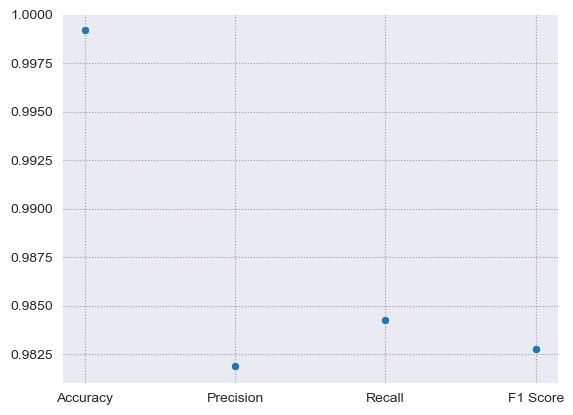

In [59]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy, precision, recall, f1])


# Applying Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
DTC_Model =DecisionTreeClassifier(criterion= 'entropy', max_depth=4, random_state=10)
DTC_Model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)

In [62]:
DTC_Model.score(X_train , y_train)

0.9794093089735788

In [63]:
DTC_Model =DecisionTreeClassifier(criterion= 'entropy', max_depth=4, random_state=10)
DTC_Model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)

In [64]:
DTC_Model.score(X_train , y_train)

0.9794093089735788

In [66]:
DTC_Model =DecisionTreeClassifier(criterion= 'gini', max_depth=4, random_state=10)
DTC_Model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=10)

In [68]:
DTC_Model.score(X_train , y_train)

0.9940421436961352

# Applying ANN

In [72]:
num_cols = Dataset.select_dtypes(include=[np.number]).columns.tolist()
X = Dataset[num_cols]


# Select the target variable
y = Dataset['attack_category']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
# Standardize the numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [74]:
# encode the target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [75]:
# define the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)

# train the MLP model on the training data
mlp.fit(X_train, y_train)

# make predictions on the test data
y_pred = mlp.predict(X_test)

# evaluate the performance of the MLP model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

In [76]:
print('Accuracy: {:.4f}'.format(accuracy))
print('Precision: {:.4f}'.format(precision))
print('Recall: {:.4f}'.format(recall))
print('F1-score: {:.4f}'.format(f1))

Accuracy: 0.9998
Precision: 0.9997
Recall: 0.9998
F1-score: 0.9997


# Clustering Using K-Mean

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


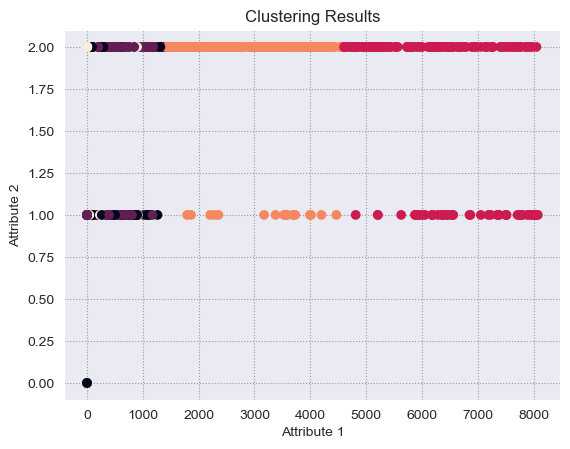

In [83]:
X = Dataset.drop('attack_category', axis = 1)

# Perform clustering using k-Means algorithm
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# Visualize the results using a scatter plot
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.title('Clustering Results')
plt.show()
